In [2]:
import pandas as pd
# Load the datasets
housing_data = pd.read_csv("Ames_HousePrice.csv")
real_estate_data = pd.read_csv("Ames Real Estate Data.csv")
merged_data= pd.read_csv("Cleaned_Ames_Housing_Data.csv")

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_15284\120841399.py:4: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_data = pd.read_csv("Ames Real Estate Data.csv")


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = [
    'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'AgeOfHouse',
    'TimeSinceLastRemodel', 'LotFrontageToLotAreaRatio', 'TotalOutdoorSpace',
    'LivingSpaceEfficiency'
]

# Ensure selected features exist
for feature in features:
    if feature not in merged_data.columns:
        print(f"Feature '{feature}' is missing in merged_data.")

X = merged_data[features]
y = merged_data['SalePrice']

# Handle missing values (if any)
X = X.fillna(X.median())
y = y.fillna(y.median())  # Optional; typically, missing target rows are removed.

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (optional for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Assuming `X` and `y` are already defined
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
#cross validation for mse and r^2
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform cross-validation for MSE
mse_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation for R^2
r2_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2')

# Print MSE results
print(f"Gradient Boosting Cross-Validation MSE Scores: {-mse_scores_gb}")  # Convert negative MSE to positive
print(f"Mean CV MSE: {-mse_scores_gb.mean()}")
print(f"Standard Deviation of CV MSE: {mse_scores_gb.std()}")

# Print R^2 results
print(f"Gradient Boosting Cross-Validation R^2 Scores: {r2_scores_gb}")
print(f"Mean CV R^2: {r2_scores_gb.mean()}")
print(f"Standard Deviation of CV R^2: {r2_scores_gb.std()}")


Gradient Boosting Cross-Validation MSE Scores: [1.24220150e+09 7.26995511e+08 8.60292137e+08 5.59194136e+08
 5.82167510e+08]
Mean CV MSE: 794170159.2335562
Standard Deviation of CV MSE: 248907809.60793856
Gradient Boosting Cross-Validation R^2 Scores: [0.78822397 0.87964547 0.83567988 0.8959197  0.88543796]
Mean CV R^2: 0.85698139455947
Standard Deviation of CV R^2: 0.04005238045794864


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_baseline = GradientBoostingRegressor(random_state=42)
gb_baseline.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred_baseline = gb_baseline.predict(X_test)

# Evaluate baseline performance
from sklearn.metrics import mean_squared_error, r2_score

mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)
print("Baseline Gradient Boosting MSE:", mse_baseline)
print("Baseline Gradient Boosting R^2 Score:", r2_baseline)


Baseline Gradient Boosting MSE: 506476449.5703469
Baseline Gradient Boosting R^2 Score: 0.9218107583988369


In [14]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_gb_model = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.6}


Tuned Gradient Boosting MSE: 586510777.8840554
Tuned Gradient Boosting R^2 Score: 0.9094551524506906


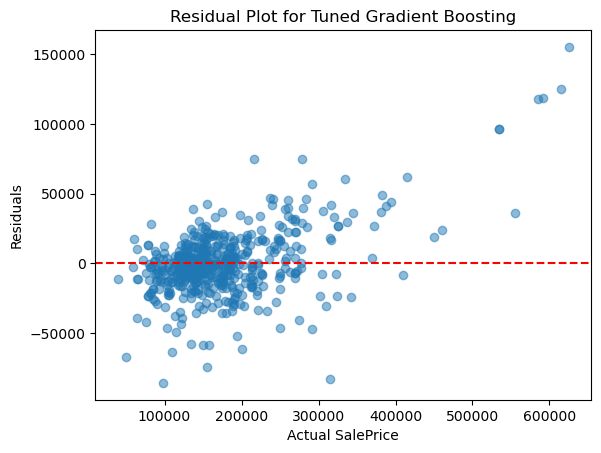

In [18]:
import matplotlib.pyplot as plt
# Predict on the test set using the best model
y_pred_tuned = best_gb_model.predict(X_test)

# Evaluate performance
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print("Tuned Gradient Boosting MSE:", mse_tuned)
print("Tuned Gradient Boosting R^2 Score:", r2_tuned)

# Residual plot
residuals = y_test - y_pred_tuned
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot for Tuned Gradient Boosting")
plt.show()


Feature Importance:
                      Feature  Importance
1                OverallQual    0.544590
0                  GrLivArea    0.193159
2                TotalBsmtSF    0.116234
3                 GarageCars    0.036495
4                 AgeOfHouse    0.033087
5       TimeSinceLastRemodel    0.024826
7          TotalOutdoorSpace    0.018845
8      LivingSpaceEfficiency    0.018540
6  LotFrontageToLotAreaRatio    0.014222


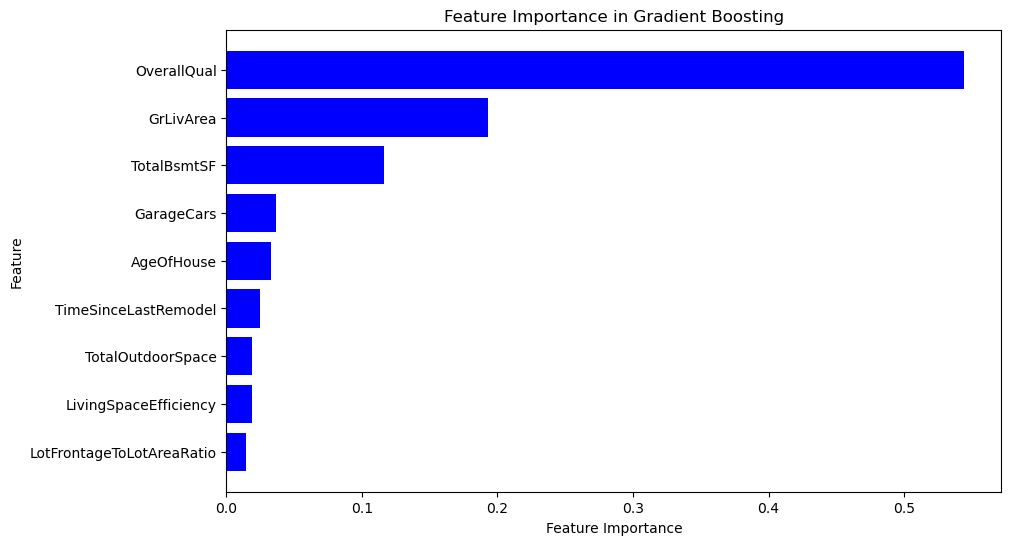

In [20]:
# Get feature importance from the tuned model
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Gradient Boosting")
plt.gca().invert_yaxis()
plt.show()


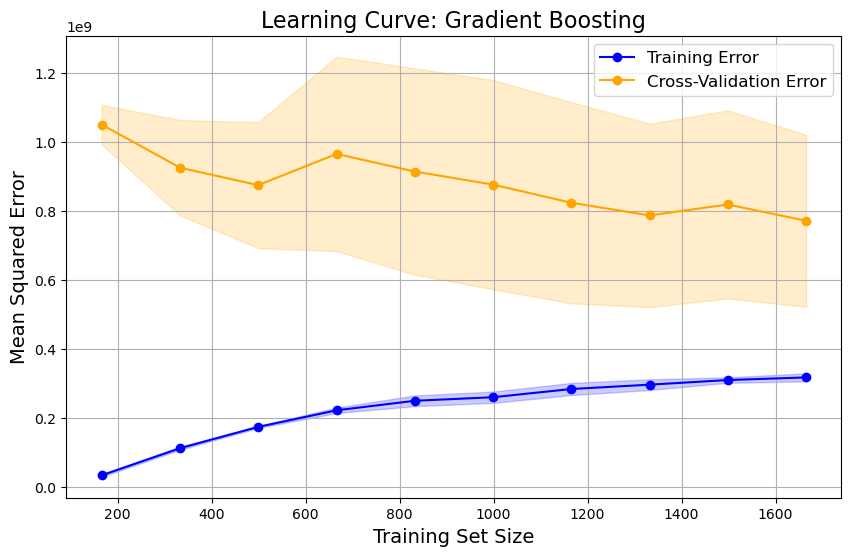

In [22]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Convert negative MSE scores to positive
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Error', color='orange', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='orange')

# Add labels, title, and legend
plt.title('Learning Curve: Gradient Boosting', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()


In [4]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(best_gb_model)

# Get SHAP values
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train)

# SHAP feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

NameError: name 'best_gb_model' is not defined